In [1]:
try:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
except:
    !pip install numpy
    !pip install pandas
    !pip install seaborn
    !pip install matplotlib
    
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

In [8]:
credit_card_df = pd.read_csv("card_transdata.csv")

# Rename features for readability
credit_card_df = credit_card_df.rename(columns={"distance_from_home":"Distance From Home",
                                                "distance_from_last_transaction":"Distance From Last Transaction",
                                                "ratio_to_median_purchase_price":"Ratio to Median Purchase Price",
                                                "repeat_retailer":"Repeat Retailer",
                                                "used_chip":"Used Chip",
                                                "used_pin_number":"Used Pin Number", 
                                                "online_order": "Online Order", 
                                                "fraud":"Fraud"})
credit_card_df.head(10)

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [3]:
credit_card_df.shape

(1000000, 8)

In [4]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Distance From Home              1000000 non-null  float64
 1   Distance From Last Transaction  1000000 non-null  float64
 2   Ratio to Median Purchase Price  1000000 non-null  float64
 3   Repeat Retailer                 1000000 non-null  float64
 4   Used Chip                       1000000 non-null  float64
 5   Used Pin Number                 1000000 non-null  float64
 6   Online Order                    1000000 non-null  float64
 7   Fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
credit_card_df.describe()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation heatmap

Correlation heatmaps helps identify which variables may potentially result in multicolinarity, which would compromise the integrity of the model.

Multicolinearity happens when two or more features in a model are correlated with one another. Multicolinearity can be a problem as
1. Strongly correlated variables are redundant, and often they do not bring additional information.
2. Perhaps most importantly, it is difficult interpret the model and the feature impact as well as assess the effect of independent variable on dependent variables. The variance explained by the multi-collinear features in your model will not reflect the actual contributions of each feature since the variance explained is 'spread out' among multiple features. In other words, it's difficult to isolate the effect of one variable as any changes of one feature/independent variable will also be accompanied by correlated changes in another feature(s)/independent variable(s), altogether effecting the dependent variable.
3. These strongly correlated variables can complicate the model-building process, adding computational weight and producing overfitting in some cases.

<Axes: >

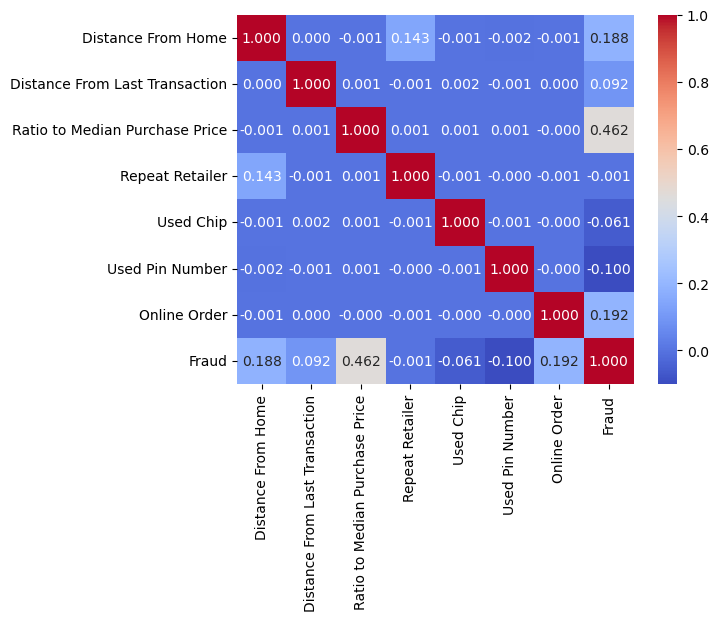

In [6]:
corr_matrix = credit_card_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")

The correlation heatmap shows that the features (i.e., exclude the label `fraud`) are not highly correlated. Overall, multicollinearity is not a problem for this dataset.

Moreover, we can see that correlation between Ratio to Median Purchase Price and Fraud is almost 1/2, so we should expect it to be the highest feature in the LIME and SHAP analysis. Distance from Home and Online Order were also higher than most at around 19%.

### Features and Class Distribution

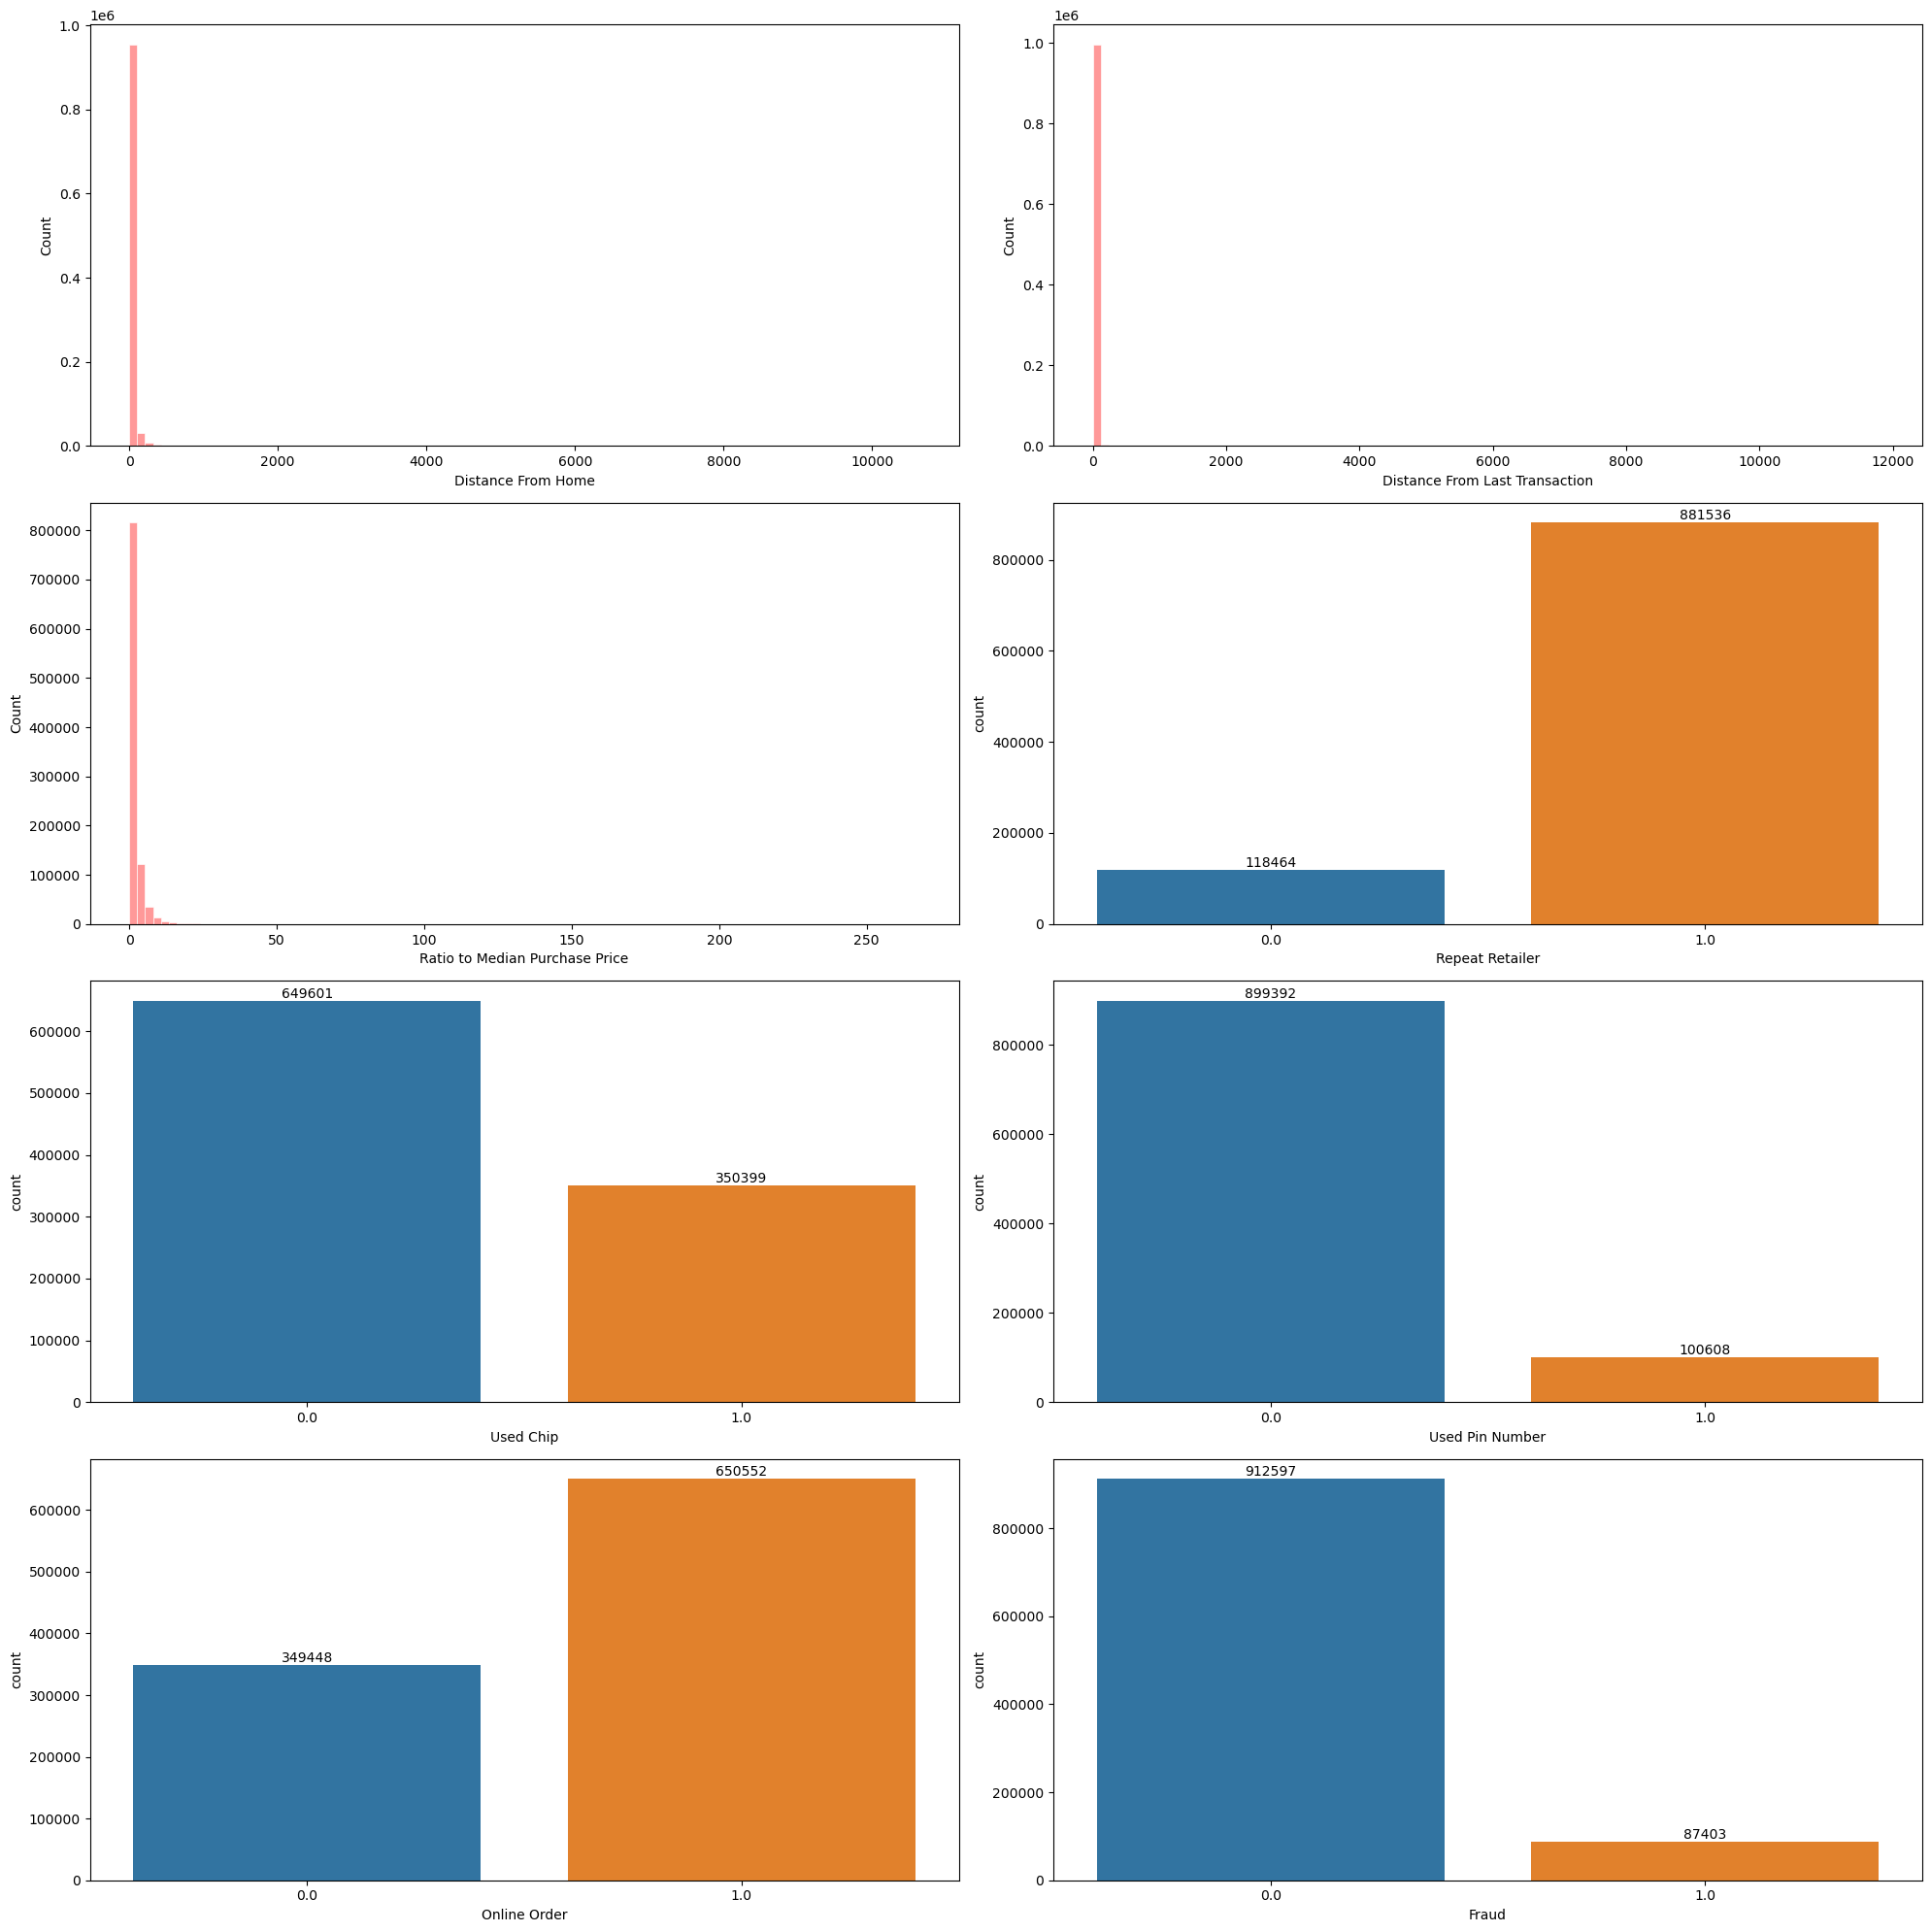

In [7]:
# Create a subplot with multiple plots
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

continuous_data = ["Distance From Home", "Distance From Last Transaction", "Ratio to Median Purchase Price"]
categorical_data = ["Repeat Retailer", "Used Chip", "Used Pin Number", "Online Order", "Fraud"]

index = 0
continuous = True

# Plot histograms for all columns
for row in range(4):
    for col in range (2):
        
        if index > 2 and continuous == True:   # After plotting continuous data, plot categorical data
            index = 0
            continuous = False
            
        if continuous == True:
            # Columns of distance_from_home and distance_from_last_transaction is in 10^6.
            sns.histplot(credit_card_df,
                         x = continuous_data[index],
                         bins = 100,
                         alpha = 0.4,
                         color = "red",
                         edgecolor = "white",
                         ax = axs[row, col])
        else:
            count_plot = sns.countplot(credit_card_df,
                                       x = categorical_data[index],
                                       ax = axs[row, col])
            
            # Label count
            count_plot.bar_label(count_plot.containers[0])
            
        index += 1
        
plt.tight_layout()
plt.show();

**Continuous features**
- All the features are skewed at the lower end (i.e., short distance from home and from the last transaction, as well as a low ratio to median purchase price)

**Categorical features**
- `Repeat Retailer`: ~ 12% of the transactions occured at different retailer, while 88% occured at the same retailer
- `Used Chip`: ~ 65% of the transactions didn't use chip, while 35% did.
- `Used Pin Number`: ~ 90% of the transactions didn't use pin number, while 10% did
- `Online Order`: ~ 35% of the transactions was ordered offline, while 65% is online

**Class distribution**
- `Fraud`: ~ 91% of the transactions are non-fraudulent, while 9% are. This results in an underepresentative of fraudulent transactions

### Features Distribution relative to Class

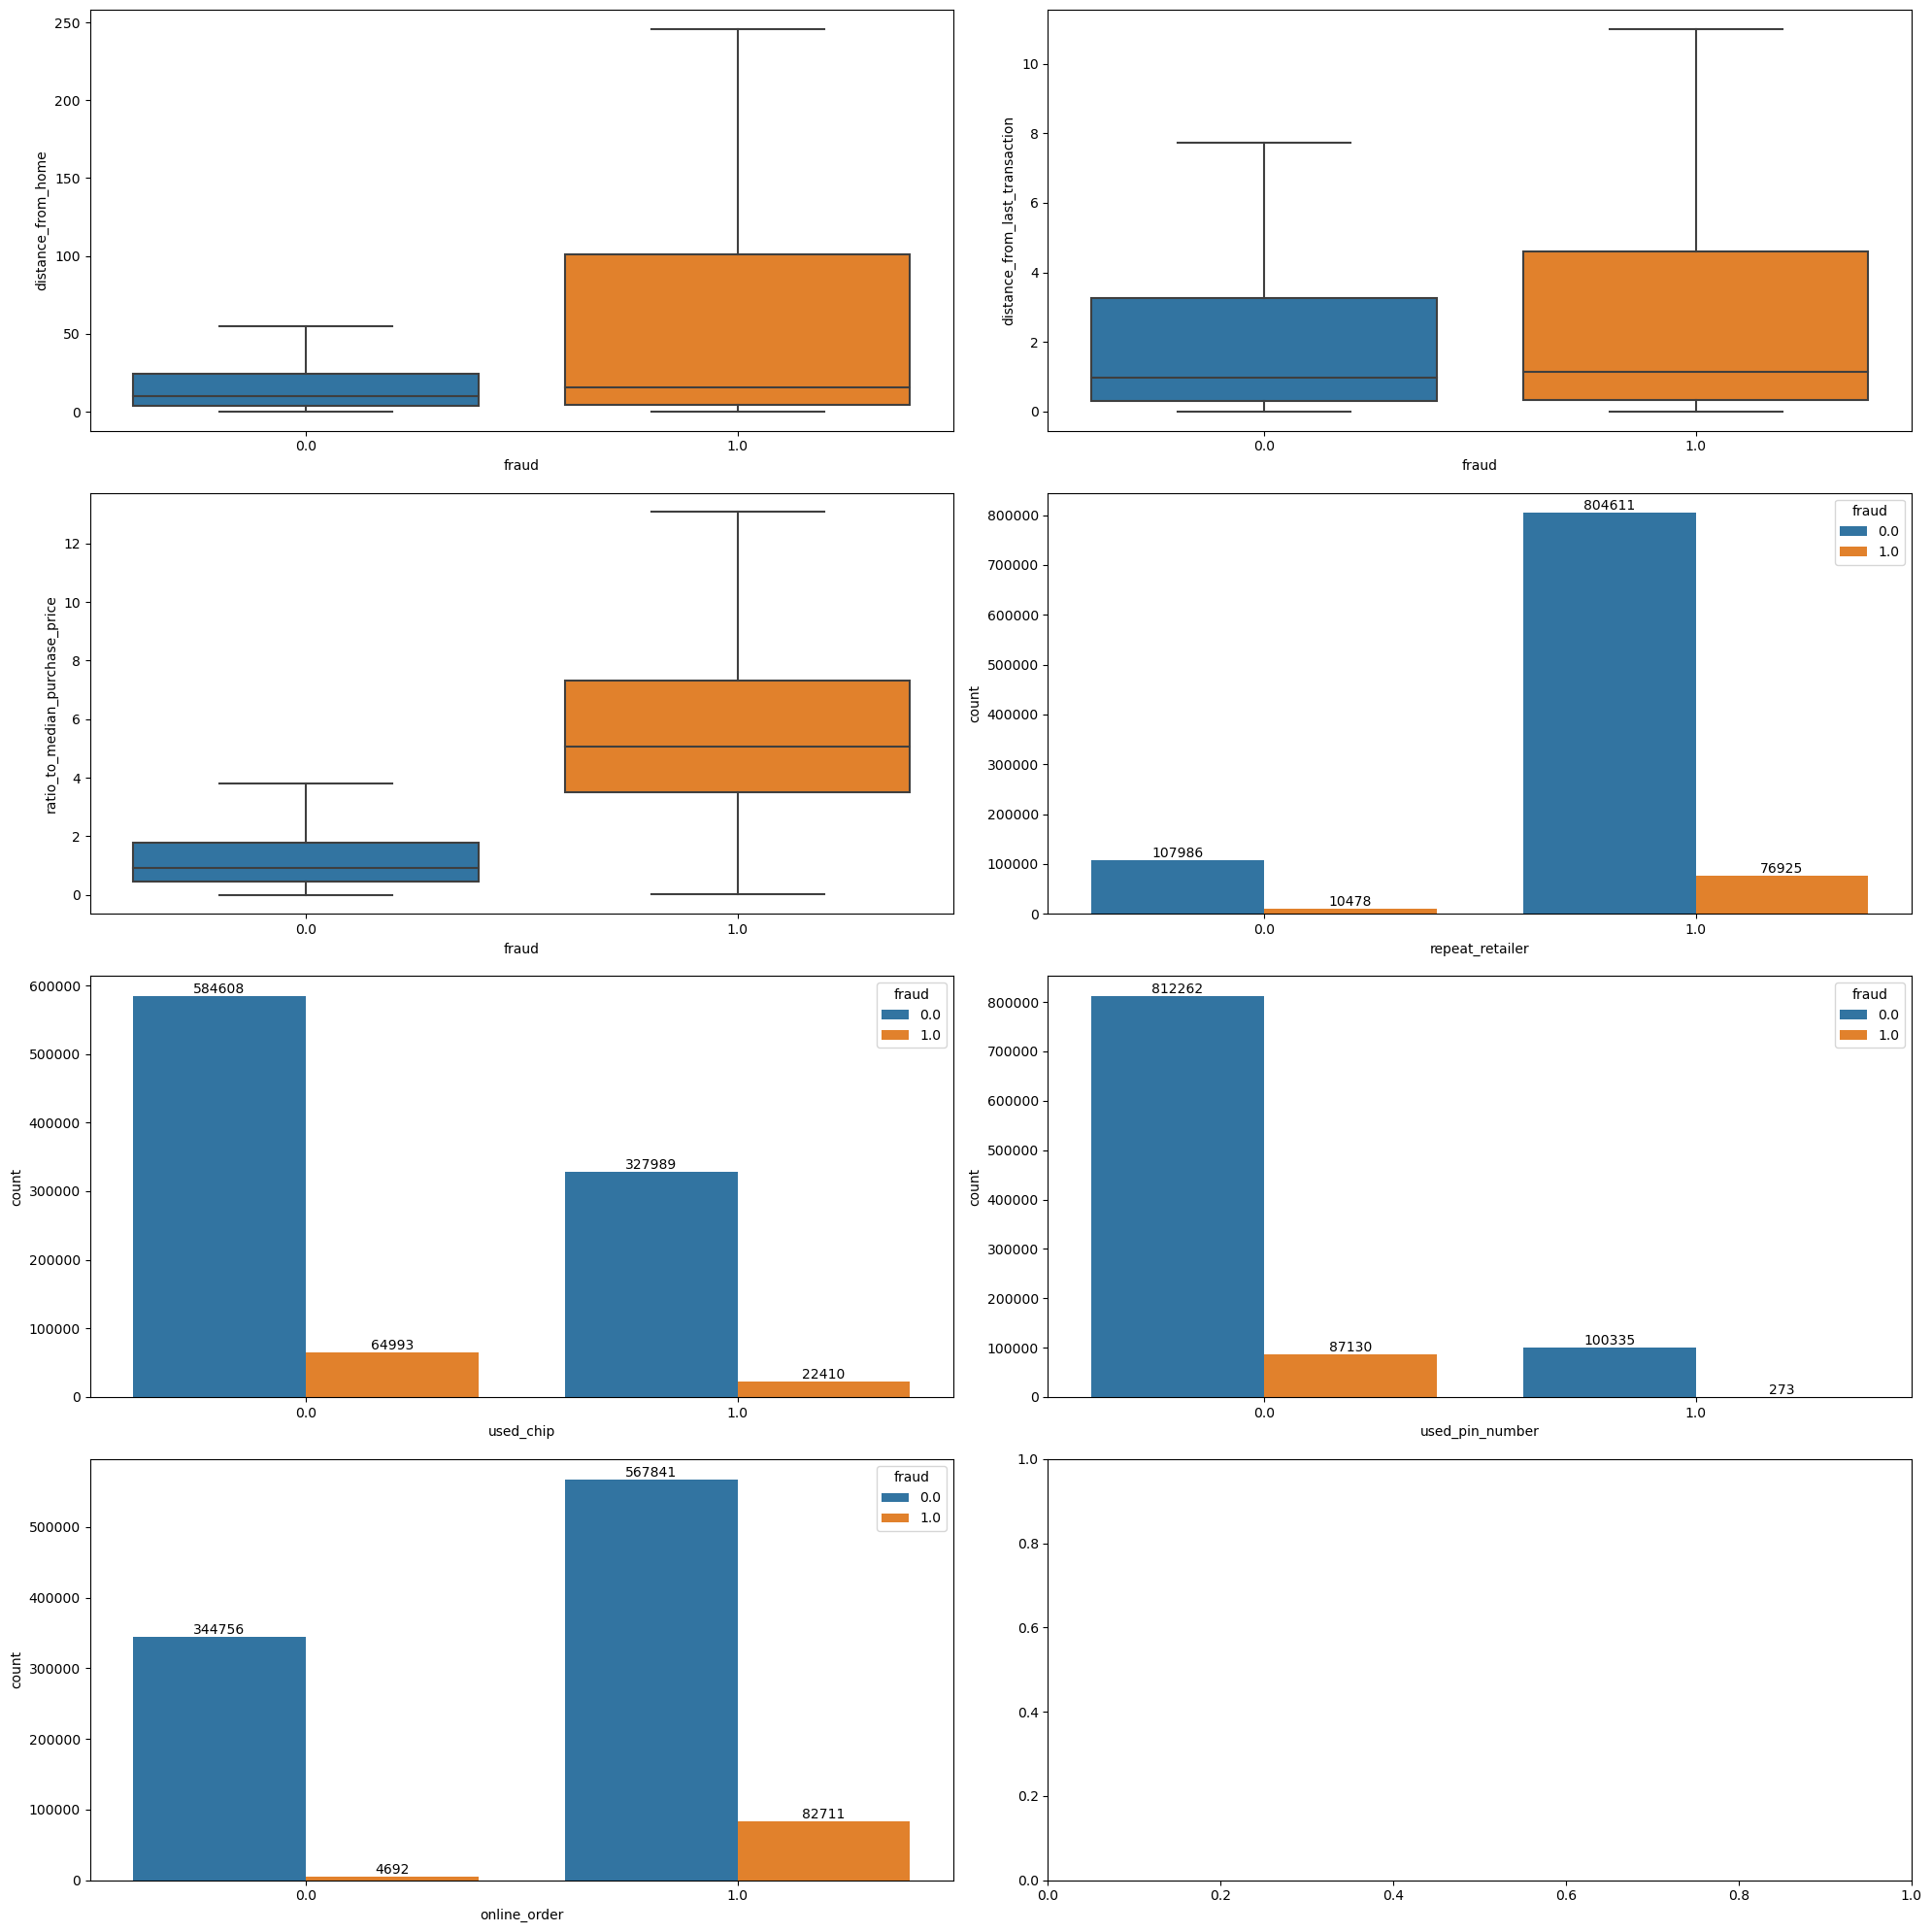

In [54]:
# Create a subplot with multiple plots
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

index = 0
continuous = True

# Plot histograms for all columns
for row in range(4):
    for col in range (2):
        
        if index == 4:  # Don't plot fraud by itself
            break
        
        if index > 2 and continuous == True:   # After plotting continuous data, plot categorical data
            index = 0
            continuous = False
            
        if continuous == True:
            # Columns of distance_from_home and distance_from_last_transaction is in 10^6.
            sns.boxplot(data = credit_card_df,
                        x = "fraud",
                        y = continuous_data[index],
                        showfliers = False,   # Remove outliers
                        ax = axs[row, col])   
        else:
            count_plot = sns.countplot(credit_card_df,
                                       x = categorical_data[index],
                                       hue = "fraud",
                                       ax = axs[row, col])
            
            # Label count
            count_plot.bar_label(count_plot.containers[0])
            count_plot.bar_label(count_plot.containers[1])
            
        index += 1
            
        
plt.tight_layout()
plt.show();

**Continuous features**
- All the features generally have a higher value for fraud transactions compared to non-fraudulent transactions, which is rather intuitive.

**Categorical features**
- `Repeat Retailer`: ~ 8.8% and ~ 8.7% of the transactions that are fraud occured at different and same retailer, respectively.
- `Used Chip`: ~ 10% and ~ 6.4% of the transactions that are fraud didn't and did use chip, respectively.
- `Used Pin Number`: ~ 9.7% and 0.27% of the transactions that are fraud didn't and did use pin number, respectively
- `Online Order`: ~ 1.3% and 12.7% of the transactions that are fraud was ordered offline and online, respectively

Overall, we can see a clear discreprancy in the percentages from `Used Chip`, `Used Pin Number`, and `Online Order` features, which suggested that transactions that didn't use chip, pin number, and ordered online are more likely to be fraud. On the other hand, the percentages from the `Repeat Retailer` are almost the same, indicating it's equally likely to be fraud regardless if the transactions occured at the same retailer or not, indicating the feature might not have a significant impact/weight.